In [1]:
# TODO : Import necessary python libraries needed for this project

# For Data preparation and manipulation
import numpy as np
import pandas as pd
# For visualization
import matplotlib.pyplot as plt
import seaborn as sb

# Set Seaborn styles
sb.set()

# For implementing pipeline
from sklearn.pipeline import Pipeline

# For Scaling the data
from sklearn.preprocessing import StandardScaler

# For Classification
from sklearn.neighbors import KNeighborsClassifier

# For Splitting the data for training and Validation
from sklearn.model_selection import train_test_split

# For creating model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Principal Component Analysis for Dimensionality Reduction
from sklearn.decomposition import PCA

# For Shuffling the DataFrame
from sklearn.utils import shuffle

In [2]:
# TODO : Load previous individuals loan data
loan_train = pd.read_csv('C:/Users/vinoth-pt5333/Project/train.csv')

In [3]:
# TODO : Let's know how many factors of an individual and Number of Samples
print("The Loan Prediction Dataset has")
print("\t\tNumber of Factors : \t", loan_train.shape[1] - 1)
print("\t\tNumber of Samples : \t", loan_train.shape[0])

The Loan Prediction Dataset has
		Number of Factors : 	 12
		Number of Samples : 	 4912


# Exploratory Data Analysis

### Let's do some descriptive statistics

In [4]:
# TODO : Descriptive Statistics on Loan Data
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,4912.000000,4912.000000,4736.000000,4800.000000,4512.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6104.686294,2924.162130,85.524038,65.072899,0.364595
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5800.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [5]:
# TODO : Print the factors of Loan Data
print('Loan Data Factors : \n')
j = 1
for i in loan_train.columns:
    print(j, '.', i)
    j += 1

Loan Data Factors : 

1 . Loan_ID
2 . Gender
3 . Married
4 . Dependents
5 . Education
6 . Self_Employed
7 . ApplicantIncome
8 . CoapplicantIncome
9 . LoanAmount
10 . Loan_Amount_Term
11 . Credit_History
12 . Property_Area
13 . Loan_Status


### Let's check the dataset is Balanced or Imbalanced

In [6]:
# Let's check is there any null values on Loan_Status
loan_train['Loan_Status'].isnull().sum()

0

In [7]:
# TODO : To get unique values and value_counts on Loan_Status
print("Unique values : ", loan_train['Loan_Status'].unique())
print("Unique values counts : \n", loan_train['Loan_Status'].value_counts())

Unique values :  ['Y' 'N']
Unique values counts : 
 Y    3376
N    1536
Name: Loan_Status, dtype: int64


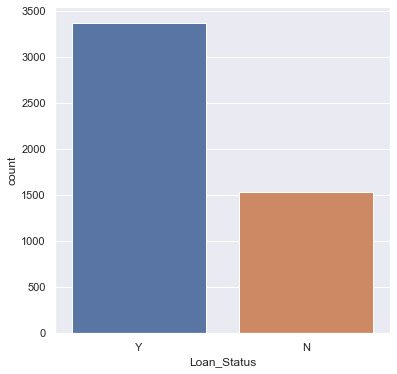

In [8]:
# Let's plot the Unique value counts
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Loan_Status', data = loan_train)
plt.savefig('C:/Users/vinoth-pt5333/Project/loan_status_counts.png')

* Hence it is a Imbalanced Dataset.
* Two-third of Loan_Status is having Yes value.
* One-third of Loan_Status is having No value.

Two methods for handling Imbalanced Dataset.

* Increase rejected applicants i.e., Loan_Status having No values
* Remove accepted applicants i.e., Loan_Status Yes values

#### The goal is to remove the samples havin null values in any of the columns and Loan_Status must be Yes

In [9]:
loan_train.isnull().sum()

Loan_ID                0
Gender               104
Married               24
Dependents           120
Education              0
Self_Employed        256
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount           176
Loan_Amount_Term     112
Credit_History       400
Property_Area          0
Loan_Status            0
dtype: int64

In [10]:
# columns_having_null_values = ['Gender', 'Married', 'Dependents', 'Self_Employed',
#                               'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
# for column in columns_having_null_values:
#     samples_index_to_be_dropped = loan_train[loan_train[column].isnull()]
#     samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
#     loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
#     loan_train.reset_index(drop = True, inplace = True)
    
# columns_having_outliers = {'ApplicantIncome':25000, 'CoapplicantIncome':15000, 'LoanAmount':400}
# for column in columns_having_outliers:
#     samples_index_to_be_dropped = loan_train[loan_train[column] > columns_having_outliers[column]]
#     samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
#     loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
#     loan_train.reset_index(drop = True, inplace = True)

In [11]:
loan_train.shape

(4912, 13)

### Feature Engineering

#### TODO : Let's Explore each and every factors

#### 1. Loan_ID

In [12]:
# 1. Loan ID
loan_train['Loan_ID'].describe()

count         4912
unique        4912
top       LP001002
freq             1
Name: Loan_ID, dtype: object

Each Loan taken individual having their own individual Loan_ID. But we know the fact, in anyway an individual's Loan_ID is not going to create an impact on their Loan Status. So we can eliminate this column.

#### 2. Gender

In [13]:
# TODO : Describe Gender column
loan_train['Gender'].describe()

count     4808
unique       2
top       Male
freq      3912
Name: Gender, dtype: object

In [14]:
print("Number of null values : ", loan_train['Gender'].isnull().sum())
print("Unique values : ", loan_train['Gender'].unique())
print("Value counts : \n", loan_train['Gender'].value_counts())

Number of null values :  104
Unique values :  ['Male' 'Female' nan]
Value counts : 
 Male      3912
Female     896
Name: Gender, dtype: int64


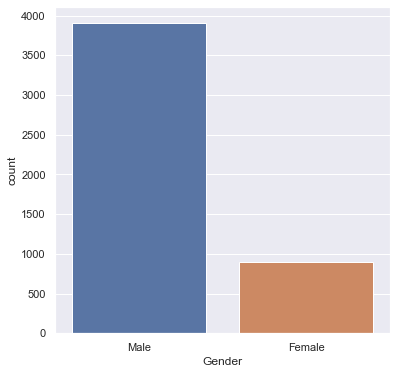

In [15]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = loan_train)
plt.savefig('C:/Users/vinoth-pt5333/Project/gender_counts_0.png')

In [16]:
# TODO : Print the samples having null values in gender column
samples_with_null_values_on_gender_column = loan_train[loan_train['Gender'].isnull()]
samples_with_null_values_on_gender_column

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001025,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001128,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001173,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001190,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP001316,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4775,LP005777,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
4805,LP005807,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N
4874,LP005876,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N
4886,LP005888,NaN,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban,Y


In [17]:
# samples_index_to_be_dropped = loan_train[loan_train['Gender'].isnull()]
# samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
# loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
# loan_train.reset_index(drop = True, inplace = True)

* Most of these people are married. So we can't fill Gender based on Married column.
* Most of these people are graduated. So we can't fill Gender based on Education column.
* Most of these people are self employed. So we can't fill Gender based on Self_Employed column.
* Most of these people are having Credit_History and Loan_Amount_Term as 360 days(1 year).
* Since we are going to predict applicant's Gender, we can omit CoapplicantIncome
* So we are going predict the Gender based on Dependents, ApplicantIncome, LoanAmount, and Property_Area

In [18]:
# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = loan_train, hue = 'Married')
# plt.savefig('../images/gender_counts_1.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = loan_train, hue = 'Dependents')
# plt.savefig('../images/gender_counts_2.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = loan_train, hue = 'Education')
# plt.savefig('../images/gender_counts_3.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = loan_train, hue = 'Self_Employed')
# plt.savefig('../images/gender_counts_4.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = loan_train, hue = 'Loan_Amount_Term')
# plt.savefig('../images/gender_counts_5.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = loan_train, hue = 'Credit_History')
# plt.savefig('../images/gender_counts_6.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Gender', data = loan_train, hue = 'Property_Area')
# plt.savefig('../images/gender_counts_7.png')
# plt.show()

In [19]:
# Initialize Gender predictor columns list
GENDER_PREDICTOR_COLUMNS = ['Dependents', 'ApplicantIncome', 'LoanAmount', 'Property_Area', 'Gender']

# Let's get the rows not having null values on gender column
samples_without_null_values_on_gender_column = loan_train[~loan_train['Gender'].isnull()][GENDER_PREDICTOR_COLUMNS]
print("Number of Samples Before dropping samples having null values in predictor columns for Gender column: ", 
     samples_without_null_values_on_gender_column.shape[0])

# Dropping samples having null values in predictor columns
samples_without_null_values_on_gender_column = samples_without_null_values_on_gender_column.dropna(how = 'any')
print("Number of Samples After dropping samples having null values in predictor columns for Gender column: ", 
     samples_without_null_values_on_gender_column.shape[0])

# Conveting categorical values on Dependents column to numerical values
samples_without_null_values_on_gender_column['Dependents'] = samples_without_null_values_on_gender_column['Dependents'].apply(
    lambda x : {'0': 0, '1':1, '2':2, '3+':3}[x]
)
# Conveting categorical values on Property_Area column to numerical values
samples_without_null_values_on_gender_column['Property_Area'] = samples_without_null_values_on_gender_column['Property_Area'].apply(
    lambda x : {'Urban': 2, 'Semiurban':1.5, 'Rural':1}[x]
)

# Building Gender Predictor using Pipeline and KNeigborsClassifiers
Gender_predictor = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('gen_predictor', KNeighborsClassifier(n_neighbors = 1))
])
Gender_predictor.fit(samples_without_null_values_on_gender_column.iloc[:, :-1].values,
                    samples_without_null_values_on_gender_column.iloc[:, -1].values)

Number of Samples Before dropping samples having null values in predictor columns for Gender column:  4808
Number of Samples After dropping samples having null values in predictor columns for Gender column:  4528


Pipeline(steps=[('scaler', StandardScaler()),
                ('gen_predictor', KNeighborsClassifier(n_neighbors=1))])

In [20]:
# Function which fills null values on Gender column
def gender_null_value_filler(df, Gender_predictor):
    for row in range(df.shape[0]):
        if df.loc[row, 'Gender'] is np.nan:
            X = loan_train.loc[row, GENDER_PREDICTOR_COLUMNS[:-1]].values.reshape(1, -1)
            X[0][0] = {'0': 0, '1':1, '2':2, '3+':3}[X[0][0]]
            X[0][3] = {'Urban': 2, 'Semiurban':1.5, 'Rural':1}[X[0][3]]
            df.loc[row, 'Gender'] = Gender_predictor.predict(X)
    return df

In [21]:
# TODO : Filling null values on Gender columns optimally
loan_train = gender_null_value_filler(loan_train, Gender_predictor)

In [22]:
# TODO : Encoding Gender Column - Male : 1, Female : 0
loan_train['Gender'] = loan_train.Gender.apply(lambda x : {'Male': 1, 'Female' : 0}[x])

#### 3. Married

In [23]:
# TODO : Describing Married column
loan_train['Married'].describe()

count     4888
unique       2
top        Yes
freq      3184
Name: Married, dtype: object

In [24]:
print("Number of null values : ", loan_train['Married'].isnull().sum())
print("Unique values : ", loan_train['Married'].unique())
print("Value counts : \n", loan_train['Married'].value_counts())

Number of null values :  24
Unique values :  ['No' 'Yes' nan]
Value counts : 
 Yes    3184
No     1704
Name: Married, dtype: int64


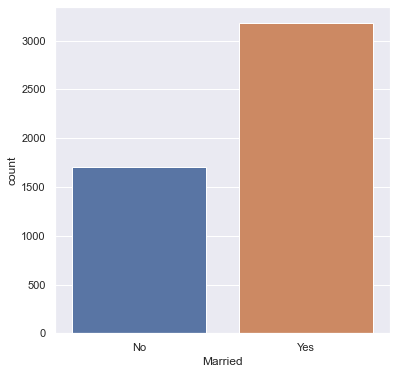

In [25]:
# Let's plot the Unique value counts
plt.figure(figsize = (6, 6))
sb.countplot(x = 'Married', data = loan_train)
plt.savefig('C:/Users/vinoth-pt5333/Project/married_counts_0.png')

There are three samples having null values on married column.

Let's get the samples having null values.

In [26]:
# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Married', data = loan_train, hue = 'Gender')
# plt.savefig('../images/married_counts_1.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Married', data = loan_train, hue = 'Dependents')
# plt.savefig('../images/married_counts_2.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Married', data = loan_train, hue = 'Education')
# plt.savefig('../images/married_counts_3.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Married', data = loan_train, hue = 'Self_Employed')
# plt.savefig('../images/married_counts_4.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Married', data = loan_train, hue = 'Loan_Amount_Term')
# plt.savefig('../images/married_counts_5.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Married', data = loan_train, hue = 'Credit_History')
# plt.savefig('../images/married_counts_6.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Married', data = loan_train, hue = 'Property_Area')
# plt.savefig('../images/married_counts_7.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Married', data = loan_train, hue = 'Loan_Status')
# plt.savefig('../images/married_counts_8.png')
# plt.show()

In [27]:
# TODO : Print the samples having null values in gender column
samples_with_null_values_on_gender_column = loan_train[loan_train['Married'].isnull()]
samples_with_null_values_on_gender_column

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001106,1,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001230,1,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP001437,0,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y
718,LP001720,1,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
842,LP001844,1,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
1049,LP002051,0,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y
1332,LP002334,1,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
1456,LP002458,1,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
1663,LP002665,0,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y
1946,LP002948,1,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y


In [28]:
# samples_index_to_be_dropped = loan_train[loan_train['Married'].isnull()]
# samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
# loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
# loan_train.reset_index(drop = True, inplace = True)

In [29]:
loan_train[loan_train['Married'] == 'Yes'].describe(include = 'all').iloc[:, :]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,3184,3184.000000,3184,3120,3184,3040,3184.000000,3184.000000,3072.000000,3112.000000,2896.000000,3184,3184
unique,3184,NaN,1,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001003,NaN,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,NaN,3184,1392,2472,2608,NaN,NaN,NaN,NaN,NaN,1208,2280
mean,NaN,0.922111,NaN,NaN,NaN,NaN,5629.173367,1794.632965,155.750000,336.987147,0.842541,NaN,NaN
std,NaN,0.268040,NaN,NaN,NaN,NaN,6981.564870,2037.717994,89.831711,66.664036,0.364295,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,150.000000,0.000000,17.000000,12.000000,0.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,2799.000000,0.000000,108.000000,360.000000,1.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,NaN,3854.500000,1625.000000,132.000000,360.000000,1.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN,5821.000000,2466.000000,178.500000,360.000000,1.000000,NaN,NaN


* There are 398 married applicants, among them 309 are Graduated, 326 are Not Self_Employed, 151 semi-urban.
* From this, we can assume that all missing samples as Married.

In [30]:
# Let's fill null values in Married columns with 'Yes'
loan_train['Married'] = loan_train['Married'].fillna('Yes')

In [31]:
# TODO : To know the unique value counts
loan_train['Married'].value_counts()

Yes    3208
No     1704
Name: Married, dtype: int64

Since most of the applicant are married, we are going to encode Yes with 1 and No with 0

In [32]:
# TODO : encoding categorical values into numerical values
loan_train['Married'] = loan_train['Married'].apply(lambda x : {'Yes' : 1, 'No' : 0}[x])

#### 4. Dependents

In [33]:
# TODO : Describing Dependents column
loan_train['Dependents'].describe()

count     4792
unique       4
top          0
freq      2760
Name: Dependents, dtype: object

* From my thought, Dependents may be representing children.
* If the applicant is not married, then we are going to fill that null value with 0
* If the applicant is married, then we are going to fill that null value with 1

In [34]:
print("Number of null values : ", loan_train['Dependents'].isnull().sum())
print("Unique values : ", loan_train['Dependents'].unique())
print("Value counts : \n", loan_train['Dependents'].value_counts())

Number of null values :  120
Unique values :  ['0' '1' '2' '3+' nan]
Value counts : 
 0     2760
1      816
2      808
3+     408
Name: Dependents, dtype: int64


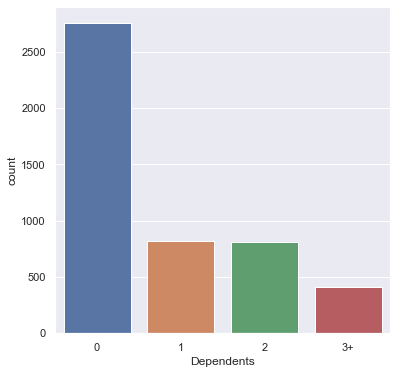

In [35]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Dependents', data = loan_train)
plt.savefig('C:/Users/vinoth-pt5333/Project/dependents_counts_0.png')
plt.show()

In [36]:
# TODO : Display the 15 rows having null values in Dependents column
loan_train[loan_train['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001104,1,1,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001106,1,1,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001122,1,1,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001228,1,1,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001230,1,1,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4653,LP005655,0,0,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,Y
4733,LP005735,0,1,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y
4815,LP005817,1,1,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,N
4869,LP005871,1,1,NaN,Graduate,No,5116,1451.0,165.0,360.0,0.0,Urban,N


Most of them are married. So we can fill the null values on Dependents column based on Married column

In [37]:
# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Dependents', data = loan_train, hue = 'Gender')
# plt.savefig('../images/dependents_counts_1.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Dependents', data = loan_train, hue = 'Married')
# plt.savefig('../images/dependents_counts_2.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Dependents', data = loan_train, hue = 'Education')
# plt.savefig('../images/dependents_counts_3.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Dependents', data = loan_train, hue = 'Self_Employed')
# plt.savefig('../images/dependents_counts_4.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Dependents', data = loan_train, hue = 'Loan_Amount_Term')
# plt.savefig('../images/dependents_counts_5.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Dependents', data = loan_train, hue = 'Credit_History')
# plt.savefig('../images/dependents_counts_6.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Dependents', data = loan_train, hue = 'Property_Area')
# plt.savefig('../images/dependents_counts_7.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Dependents', data = loan_train, hue = 'Loan_Status')
# plt.savefig('../images/dependents_counts_8.png')
# plt.show()

#### Drop the samples having yes value on Loan_Status on the above samples listed

In [38]:
# samples_index_to_be_dropped = loan_train[loan_train['Dependents'].isnull()]
# samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
# loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
# loan_train.reset_index(drop = True, inplace = True)

In [39]:
# TODO : Function for filling null values on dependents columns
def dependents_null_value_filler(df):
    for row in range(df.shape[0]):
        if df.loc[row, 'Dependents'] is np.nan:
            df.loc[row, 'Dependents'] = str(df.loc[row, 'Married'])
    return df

In [40]:
# TODO : Fill null values on Dependents column
loan_train = dependents_null_value_filler(loan_train)

#### 5. Education

In [41]:
# TODO : Descriptive Statistics on EDucation columns
loan_train['Education'].describe()

count         4912
unique           2
top       Graduate
freq          3840
Name: Education, dtype: object

In [42]:
# TODO : Number of nul values on Education column
loan_train['Education'].isnull().sum()

0

* There are no null values in Education column
* There are two unique values in Education column.
* We can encode Graduate as 1 and Not Graduate as 0

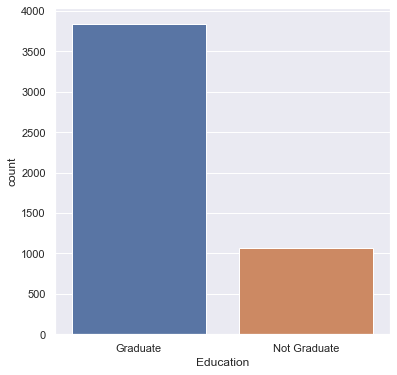

In [43]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Education', data = loan_train)
plt.savefig('C:/Users/vinoth-pt5333/Project/education_counts_0.png')
plt.show()

In [44]:
# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Education', data = loan_train, hue = 'Gender')
# plt.savefig('../images/education_counts_1.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Education', data = loan_train, hue = 'Married')
# plt.savefig('../images/education_counts_2.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Education', data = loan_train, hue = 'Dependents')
# plt.savefig('../images/education_counts_3.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Education', data = loan_train, hue = 'Self_Employed')
# plt.savefig('../images/education_counts_4.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Education', data = loan_train, hue = 'Loan_Amount_Term')
# plt.savefig('../images/education_counts_5.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Education', data = loan_train, hue = 'Credit_History')
# plt.savefig('../images/education_counts_6.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Education', data = loan_train, hue = 'Property_Area')
# plt.savefig('../images/education_counts_7.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Education', data = loan_train, hue = 'Loan_Status')
# plt.savefig('../images/education_counts_8.png')
# plt.show()

In [45]:
# TODO : Encoding categorical data into Numerical data
loan_train['Education'] = loan_train['Education'].apply(lambda x : {'Graduate' : 1, 'Not Graduate' : 0}[x])

#### 6. Self_Employed

In [46]:
# TODO : Descriptive Statistics on Self_Employed column
loan_train['Self_Employed'].describe()

count     4656
unique       2
top         No
freq      4000
Name: Self_Employed, dtype: object

In [47]:
# TODO : Uniques and Values count on Self_Employed column
print("Number of null values : ", loan_train['Self_Employed'].isnull().sum())
print("Unique values : ", loan_train['Self_Employed'].unique())
print("Value counts : \n", loan_train['Self_Employed'].value_counts())

Number of null values :  256
Unique values :  ['No' 'Yes' nan]
Value counts : 
 No     4000
Yes     656
Name: Self_Employed, dtype: int64


In [48]:
# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Self_Employed', data = loan_train)
# plt.savefig('../images/employed_counts_0.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Self_Employed', data = loan_train, hue = 'Gender')
# plt.savefig('../images/employed_counts_1.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Self_Employed', data = loan_train, hue = 'Married')
# plt.savefig('../images/employed_counts_2.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Self_Employed', data = loan_train, hue = 'Dependents')
# plt.savefig('../images/employed_counts_3.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Self_Employed', data = loan_train, hue = 'Education')
# plt.savefig('../images/employed_counts_4.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Self_Employed', data = loan_train, hue = 'Loan_Amount_Term')
# plt.savefig('../images/employed_counts_5.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Self_Employed', data = loan_train, hue = 'Credit_History')
# plt.savefig('../images/employed_counts_6.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Self_Employed', data = loan_train, hue = 'Property_Area')
# plt.savefig('../images/employed_counts_7.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Self_Employed', data = loan_train, hue = 'Loan_Status')
# plt.savefig('../images/employed_counts_8.png')
# plt.show()

* Nearly 86% percentage of the applicant are not self employed.
* So we can fill the null values as Not Self employed.

#### Drop the samples having yes value on Loan_Status on the above samples listed

In [49]:
# samples_index_to_be_dropped = loan_train[loan_train['Self_Employed'].isnull()]
# samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
# loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
# loan_train.reset_index(drop = True, inplace = True)

In [50]:
# TODO : Filling Null values with No on Self_Employed column
loan_train['Self_Employed'].fillna(value = 'No', inplace = True)

# TODO : Encoding Self_Employed as 1 and Not Self_Employed as 0
loan_train['Self_Employed'] = loan_train['Self_Employed'].apply(lambda x : {'Yes' : 1, 'No' : 0}[x])


#### 7. Applicant Income

In [51]:
# Let's get the knowledge about Applicant Income

# TODO : Descriptive Statistics on Applicant Income
loan_train['ApplicantIncome'].describe()

count     4912.000000
mean      5403.459283
std       6104.686294
min        150.000000
25%       2876.000000
50%       3812.500000
75%       5800.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [52]:
# TODO : Check for null values on ApplicantIncome column
loan_train['ApplicantIncome'].isnull().sum()

0

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


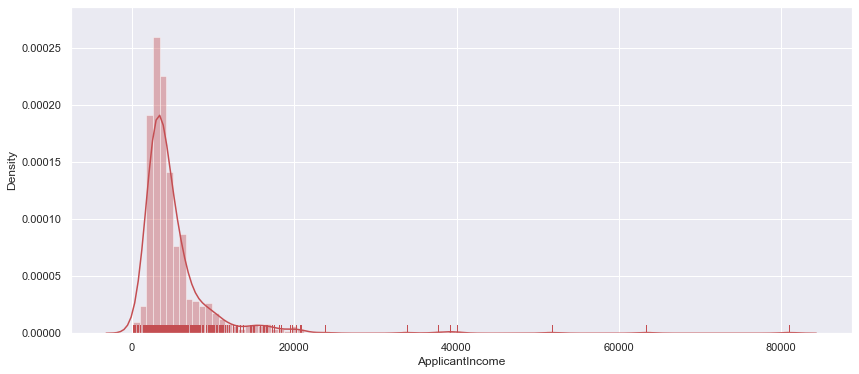

In [53]:
# TODO : Distribution of Applicant Income

plt.figure(figsize = (14, 6))
sb.distplot(loan_train['ApplicantIncome'], rug = True, bins = 100, color='r')
plt.savefig('C:/Users/vinoth-pt5333/Project/ApplicantIncomeDistribution.png')

From the above distplot, most of the Applicants income less than Rs.10,000 and some considerable amount of applicants having income between Rs.10,000 and Rs.20,000.

In [54]:
# TODO : Displaying the applicants having income more than 20,000
loan_train[loan_train['ApplicantIncome'] > 20000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
126,LP001128,1,1,3+,1,0,23803,0.0,370.0,360.0,1.0,Rural,Y
130,LP001132,1,0,0,1,1,20166,0.0,650.0,480.0,NaN,Urban,Y
155,LP001157,1,1,3+,1,0,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,LP001173,1,1,3+,1,0,51763,0.0,700.0,300.0,1.0,Urban,Y
183,LP001185,1,1,1,1,0,33846,0.0,260.0,360.0,1.0,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4606,LP005608,1,0,0,1,0,20233,0.0,480.0,360.0,1.0,Rural,N
4631,LP005633,1,1,0,1,0,63337,0.0,490.0,180.0,1.0,Urban,Y
4707,LP005709,1,1,3+,1,0,81000,0.0,360.0,360.0,0.0,Rural,N
4741,LP005743,1,0,1,1,0,37719,0.0,152.0,360.0,1.0,Semiurban,Y


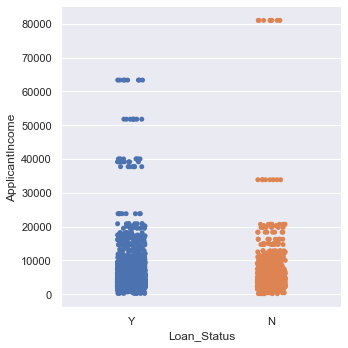

In [56]:
# TODO : Let's know the contribution of Applicant Income on determining Loan_Status 
sb.catplot(x = 'Loan_Status', y = 'ApplicantIncome', data = loan_train)
plt.savefig("C:/Users/vinoth-pt5333/Project/Loan_status.png");

From the above categorical plot, Applicant's income failed to differentiate Loan_Status. For more accuracy, we may drop the Applicant Income column.

#### 8. Co-applicant Income

In [57]:
# TODO : Descriptive Statistics on Co-applicant's Income
loan_train['CoapplicantIncome'].describe()

count     4912.000000
mean      1621.245798
std       2924.162130
min          0.000000
25%          0.000000
50%       1188.500000
75%       2302.000000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [58]:
# TODO : Check for null values on co-applicant income column
loan_train['CoapplicantIncome'].isnull().sum()

0

Hence there is no null values on Coapplicant Income column

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


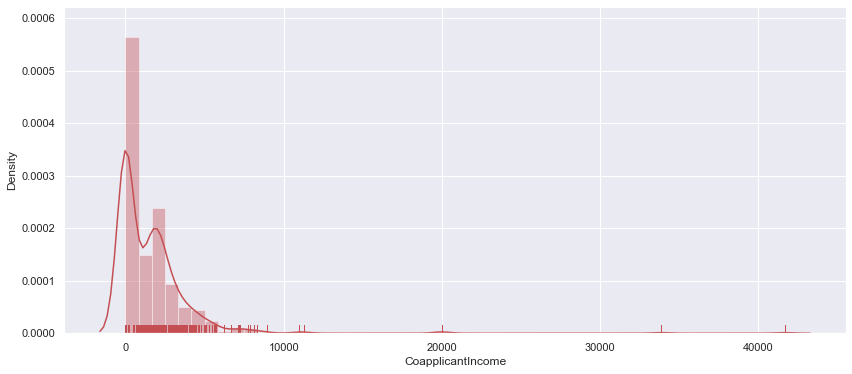

In [59]:
plt.figure(figsize = (14, 6))
sb.distplot(loan_train['CoapplicantIncome'], rug = True, color = 'r')
plt.savefig('C:/Users/vinoth-pt5333/Project/CoapplicantIncomeDistribution.png')

From the above plot most of the co-applicant income is zero or nearer to zero

In [60]:
# TODO : Let's get the different values counts on CoapplicantIncome column
loan_train['CoapplicantIncome'].value_counts()

0.0       2184
2500.0      40
2083.0      40
1666.0      40
2250.0      24
          ... 
2791.0       8
1010.0       8
1695.0       8
2598.0       8
240.0        8
Name: CoapplicantIncome, Length: 287, dtype: int64

#### 9. LoanAmount

In [61]:
# TODO : Descriptive Statistics on LoanAmount
loan_train['LoanAmount'].describe()

count    4736.000000
mean      146.412162
std        85.524038
min         9.000000
25%       100.000000
50%       128.000000
75%       168.000000
max       700.000000
Name: LoanAmount, dtype: float64

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


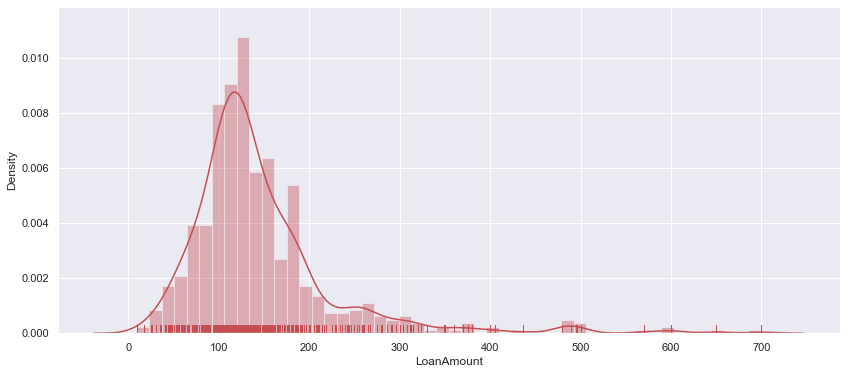

In [62]:
# TODO : Distribution of LoanAmount
plt.figure(figsize = (14, 6))
sb.distplot(loan_train['LoanAmount'], rug = True, color = 'r')
plt.savefig('C:/Users/vinoth-pt5333/Project/LoanAmountDistribution.png')

In [63]:
# TODO : Let's know the different LoanAmount
loan_train['LoanAmount'].value_counts()

120.0    160
110.0    136
100.0    120
160.0     96
187.0     96
        ... 
240.0      8
214.0      8
59.0       8
166.0      8
253.0      8
Name: LoanAmount, Length: 203, dtype: int64

In [64]:
# TODO : Count of Null values on LoanAmount column
loan_train['LoanAmount'].isnull().sum()

176


There are 22 null values on LoanAmount column

In [65]:
# TODO : Display the Samples having null values on LoanAmount
loan_train[loan_train['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001037,1,1,0,1,0,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001065,1,1,1,1,0,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001083,1,1,1,1,1,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001097,1,0,0,1,0,6782,0.0,NaN,360.0,NaN,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4777,LP005779,1,1,2,1,0,2947,1603.0,NaN,360.0,1.0,Urban,N
4822,LP005824,1,0,0,1,0,4680,2087.0,NaN,360.0,1.0,Semiurban,N
4848,LP005850,1,1,2,1,1,6633,0.0,NaN,360.0,0.0,Rural,N
4849,LP005851,1,1,1,0,0,2492,2375.0,NaN,360.0,1.0,Rural,Y


Drop the samples having yes value on Loan_Status on the above samples listed

In [66]:
# samples_index_to_be_dropped = loan_train[loan_train['LoanAmount'].isnull()]
# samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
# loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
# loan_train.reset_index(drop = True, inplace = True)

In [67]:
# TODO : To know if yes in LoanStatus, then what is the average LoanAmount 
#        and if no in LoanStatus, then what is the average LoanAmount by using GroupBy in LoanStatus

loan_train[~loan_train['LoanAmount'].isnull()].groupby('Loan_Status').describe().T.loc['LoanAmount']

Loan_Status,N,Y
count,1448.000000,3288.000000
mean,151.220994,144.294404
std,85.654847,85.393534
min,9.000000,17.000000
25%,100.000000,100.000000
50%,129.000000,126.000000
75%,176.000000,161.000000
max,570.000000,700.000000


For yes in Loan_Status, average LoanAmount is 151.22 and no in Loan_Status, average LoanAmount is 144.29.

In [68]:
# TODO : Filling Above values on LoanAmount column based on LoanStatus.
def LoanAmount_null_values_filler(df):
    for row in range(df.shape[0]):
        if pd.isnull(df.loc[row, 'LoanAmount']):
            if df.loc[row, 'Loan_Status'] == 'Y':
                df.loc[row, 'LoanAmount'] = 151.22
            elif df.loc[row, 'Loan_Status'] == 'N':
                df.loc[row, 'LoanAmount'] = 144.29
            else:
                pass
    return df

In [69]:
# TODO : Filling null values on LoanAmount
loan_train = LoanAmount_null_values_filler(loan_train)

#### 10. Loan_Amount_Term

In [70]:
# TODO : Descriptive Statistics on Loan_Amount_Term
loan_train['Loan_Amount_Term'].describe()

count    4800.000000
mean      342.000000
std        65.072899
min        12.000000
25%       360.000000
50%       360.000000
75%       360.000000
max       480.000000
Name: Loan_Amount_Term, dtype: float64

In [71]:
# TODO : Number of null values on Loan_Amount_Term
loan_train['Loan_Amount_Term'].isnull().sum()

112

In [72]:
# TODO : Unique Values count in Loan_Amount_Term column
loan_train['Loan_Amount_Term'].value_counts()

360.0    4096
180.0     352
480.0     120
300.0     104
240.0      32
84.0       32
120.0      24
60.0       16
36.0       16
12.0        8
Name: Loan_Amount_Term, dtype: int64

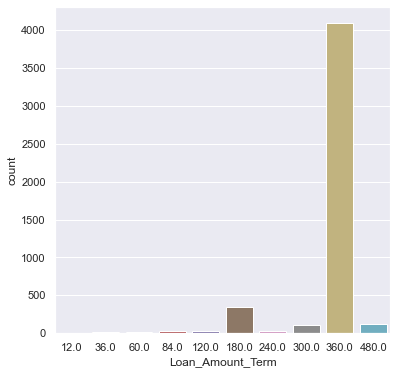

In [73]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Loan_Amount_Term', data = loan_train)
plt.savefig('C:/Users/vinoth-pt5333/Project/term_counts.png')
plt.show()

Most of the applicants which is nearly 83 % of applicant chosen to Loan_Amount_Term of 360.

In [74]:
# TODO : Display the applicant samples aving null values on Loan_Amount_Term
loan_train[pd.isnull(loan_train['Loan_Amount_Term'])]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001021,1,1,0,1,0,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001038,1,1,0,1,0,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001046,1,1,0,0,1,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001047,0,0,0,1,0,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001075,1,1,3+,0,0,4755,0.0,95.0,NaN,0.0,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4530,LP005532,1,0,0,0,0,3189,2598.0,120.0,NaN,1.0,Rural,Y
4633,LP005635,1,1,1,1,1,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
4665,LP005667,1,0,0,1,0,5124,0.0,124.0,NaN,0.0,Rural,N
4719,LP005721,0,0,0,0,0,2720,0.0,80.0,NaN,0.0,Urban,N


Drop the samples having yes value on Loan_Status on the above samples listed

In [75]:
# samples_index_to_be_dropped = loan_train[loan_train['Loan_Amount_Term'].isnull()]
# samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
# loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
# loan_train.reset_index(drop = True, inplace = True)

In [76]:
# TODO : To know if yes in LoanStatus, then what is the average Loan_Amount_Term
#        and if no in LoanStatus, then what is the average Loan_Amount_Term by using GroupBy in LoanStatus

loan_train[~loan_train['Loan_Amount_Term'].isnull()].groupby('Loan_Status').describe().T.loc['Loan_Amount_Term']

Loan_Status,N,Y
count,1488.000000,3312.000000
mean,344.064516,341.072464
std,69.075759,63.180877
min,36.000000,12.000000
25%,360.000000,360.000000
50%,360.000000,360.000000
75%,360.000000,360.000000
max,480.000000,480.000000


For both status of Loan_Status, the average Loan_Amount_Term is approximately. Let's fill them with the value of 360.

In [77]:
# TODO : Fill null values on Loan_Amount_Term
loan_train['Loan_Amount_Term'] = loan_train['Loan_Amount_Term'].fillna(value = 360)


#### 11. Credit_History

In [78]:
# TODO : Descriptive Statistics on Credit_History
loan_train['Credit_History'].describe()

count    4512.000000
mean        0.842199
std         0.364595
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Credit_History, dtype: float64

In [79]:
# TODO : Number of null values on Credit_History
loan_train['Credit_History'].isnull().sum()

400

In [80]:
# TODO : Unique values count on Credit_History
loan_train['Credit_History'].value_counts()

1.0    3800
0.0     712
Name: Credit_History, dtype: int64

In [81]:
# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Credit_History', data = loan_train)
# plt.savefig('../images/credit_counts_0.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Credit_History', data = loan_train, hue = 'Gender')
# plt.savefig('../images/credit_counts_1.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Credit_History', data = loan_train, hue = 'Married')
# plt.savefig('../images/credit_counts_2.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Credit_History', data = loan_train, hue = 'Dependents')
# plt.savefig('../images/credit_counts_3.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Credit_History', data = loan_train, hue = 'Education')
# plt.savefig('../images/credit_counts_4.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Credit_History', data = loan_train, hue = 'Self_Employed')
# plt.savefig('../images/credit_counts_5.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Credit_History', data = loan_train, hue = 'Loan_Amount_Term')
# plt.savefig('../images/credit_counts_6.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Credit_History', data = loan_train, hue = 'Property_Area')
# plt.savefig('../images/credit_counts_7.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Credit_History', data = loan_train, hue = 'Loan_Status')
# plt.savefig('../images/credit_counts_8.png')
# plt.show()

In [82]:
# TODO : Samples having null values on Credit_History
loan_train[loan_train['Credit_History'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001018,1,0,1,0,0,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001026,1,1,1,1,0,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001032,1,1,1,1,0,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001044,1,1,0,1,0,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001081,1,1,3+,0,1,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,LP005844,0,1,0,0,0,3017,663.0,102.0,360.0,NaN,Semiurban,Y
4854,LP005856,0,0,0,1,0,2667,1625.0,84.0,360.0,NaN,Urban,Y
4863,LP005865,1,1,0,0,0,4467,0.0,120.0,360.0,NaN,Rural,Y
4881,LP005883,1,1,1,1,0,1880,0.0,61.0,360.0,NaN,Rural,N


Drop the samples having yes value on Loan_Status on the above samples listed

In [83]:
# samples_index_to_be_dropped = loan_train[loan_train['Credit_History'].isnull()]
# samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
# loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
# loan_train.reset_index(drop = True, inplace = True)

In [84]:
# TODO : To know if yes in LoanStatus, then what is the average Credit_History
#        and if no in LoanStatus, then what is the average Credit_History by using GroupBy in LoanStatus

loan_train[~loan_train['Credit_History'].isnull()].groupby('Loan_Status').describe().T.loc['Credit_History']

Loan_Status,N,Y
count,1432.000000,3080.000000
mean,0.541899,0.981818
std,0.498415,0.133630
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


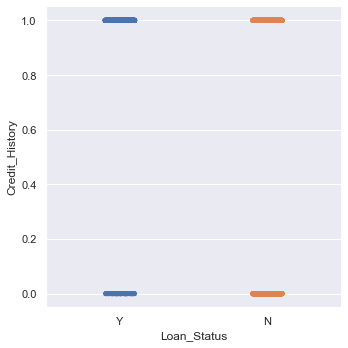

In [86]:
# TODO : To know the contribution of Credit_History on Loan_Status
sb.catplot(x = 'Loan_Status', y = 'Credit_History', data = loan_train)
plt.savefig("C:/Users/vinoth-pt5333/Project/credit_history_on_LoanStatus.png")

From the above plot, the point we got is

* If the applicant is having Credit_History, then there is a difficulty on classifying.
* But if the applicant is not having Credit_History, then there is a high probability chance of rejection.

##### Since 78 % applicants having the Credit_History, we can fill the null values with 1.0

In [87]:
# TODO : Filling null values on Credit_History
loan_train['Credit_History'] = loan_train['Credit_History'].fillna(value = 1.0)


#### 12. Property_Area

In [88]:
# TODO : Descriptive Statistics on Property_Area
loan_train['Property_Area'].describe()

count          4912
unique            3
top       Semiurban
freq           1864
Name: Property_Area, dtype: object

In [89]:
# TODO : Number of null values on Property_Area
loan_train['Property_Area'].isnull().sum()

0

In [90]:
# TODO : Unique values count in Property_Area column
loan_train['Property_Area'].value_counts()

Semiurban    1864
Urban        1616
Rural        1432
Name: Property_Area, dtype: int64

In [91]:
# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Property_Area', data = loan_train)
# plt.savefig('../images/property_counts_0.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Property_Area', data = loan_train, hue = 'Gender')
# plt.savefig('../images/property_counts_1.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Property_Area', data = loan_train, hue = 'Married')
# plt.savefig('../images/property_counts_2.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Property_Area', data = loan_train, hue = 'Dependents')
# plt.savefig('../images/property_counts_3.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Property_Area', data = loan_train, hue = 'Education')
# plt.savefig('../images/property_counts_4.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Property_Area', data = loan_train, hue = 'Self_Employed')
# plt.savefig('../images/property_counts_5.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Property_Area', data = loan_train, hue = 'Loan_Amount_Term')
# plt.savefig('../images/property_counts_6.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Property_Area', data = loan_train, hue = 'Credit_History')
# plt.savefig('../images/property_counts_7.png')
# plt.show()

# plt.figure(figsize=(6, 6))
# sb.countplot(x = 'Property_Area', data = loan_train, hue = 'Loan_Status')
# plt.savefig('../images/property_counts_8.png')
# plt.show()

Since the Property_Area column having approximately same repetitions on Property_Area columns. we can go with pandas get_dummies for creating separate column for each property area

In [92]:
# TODO : To get Property_Area Dummies
Property_Area_Dummies = pd.get_dummies(loan_train['Property_Area'])
Property_Area_Dummies

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
4907,1,0,0
4908,1,0,0
4909,0,0,1
4910,0,0,1


In [93]:
# TODO : Create Separate column for Rural and Urban Property_Area
loan_train['Property_Area_Rural'] = Property_Area_Dummies['Rural']
loan_train['Property_Area_Semiurban'] = Property_Area_Dummies['Semiurban']

In [94]:
# TODO : Dropping Property_Area column as it is replaced with dummy columns
loan_train.drop('Property_Area', axis = 1, inplace = True)

In [95]:
loan_train.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Property_Area_Rural        0
Property_Area_Semiurban    0
dtype: int64

#### Finally we replaced all the null values with suitable values.

In [96]:
loan_train.dtypes

Loan_ID                     object
Gender                       int64
Married                      int64
Dependents                  object
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                 object
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
dtype: object

Finally we encoded all the categorical columns as numerical columns optimally except Loan_ID and Loan_Status

### Feature Selection

In [97]:
# TODO : Display columns in Train Data
print(" Columns in the Train Data : \n", loan_train.columns)

 Columns in the Train Data : 
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban'],
      dtype='object')


From the above discussion, we can remove some of the columns from the training data.

Those columns are Loan_ID

Let's drop the unwanted columns from train data

In [98]:
# TODO : Dropping Loan_ID column from the Train data
loan_train.drop('Loan_ID', axis = 1, inplace = True)

## Detecting Outliers

In [99]:
loan_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban'],
      dtype='object')

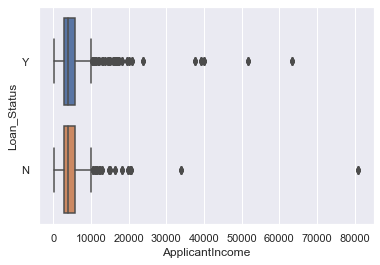

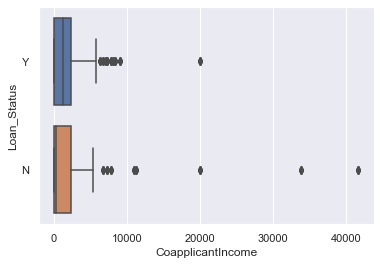

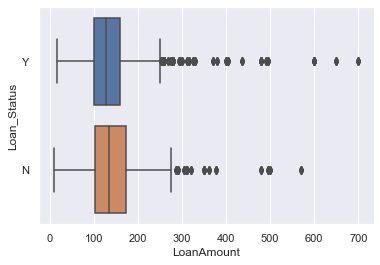

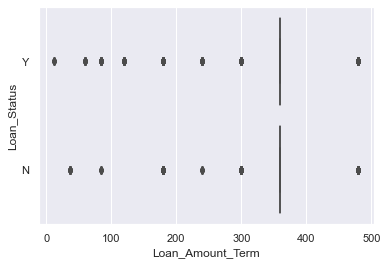

<Figure size 432x288 with 0 Axes>

In [100]:
numerical_continuous_data_column = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for column in numerical_continuous_data_column:
    sb.boxplot(x = column, y = 'Loan_Status', data = loan_train)
    plt.show()
    plt.savefig("C:/Users/vinoth-pt5333/Project/"+column+".png")

In [101]:
# TODO : Display samples having outliers on ApplicantIncome
loan_train[loan_train['ApplicantIncome'] > 25000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban
155,1,1,3+,1,0,39999,0.0,600.0,180.0,0.0,Y,0,1
171,1,1,3+,1,0,51763,0.0,700.0,300.0,1.0,Y,0,0
183,1,1,1,1,0,33846,0.0,260.0,360.0,1.0,N,0,1
185,1,1,0,1,1,39147,4750.0,120.0,360.0,1.0,Y,0,1
333,1,1,0,1,0,63337,0.0,490.0,180.0,1.0,Y,0,0
409,1,1,3+,1,0,81000,0.0,360.0,360.0,0.0,N,1,0
443,1,0,1,1,0,37719,0.0,152.0,360.0,1.0,Y,0,1
769,1,1,3+,1,0,39999,0.0,600.0,180.0,0.0,Y,0,1
785,1,1,3+,1,0,51763,0.0,700.0,300.0,1.0,Y,0,0
797,1,1,1,1,0,33846,0.0,260.0,360.0,1.0,N,0,1


Drop the samples having yes value on Loan_Status on the above samples listed

In [102]:
# samples_index_to_be_dropped = loan_train[loan_train['ApplicantIncome'] > 25000]
# samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
# loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
# loan_train.reset_index(drop = True, inplace = True)

In [103]:
# TODO : Display samples having outliers on ApplicantIncome
loan_train[loan_train['CoapplicantIncome'] > 15000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban
402,1,0,0,1,0,2500,20000.0,103.0,360.0,1.0,Y,0,1
417,1,1,2,1,1,1600,20000.0,239.0,360.0,1.0,N,0,0
581,1,0,0,1,0,1836,33837.0,90.0,360.0,1.0,N,0,0
600,0,0,3+,1,0,416,41667.0,350.0,180.0,1.0,N,0,0
1016,1,0,0,1,0,2500,20000.0,103.0,360.0,1.0,Y,0,1
1031,1,1,2,1,1,1600,20000.0,239.0,360.0,1.0,N,0,0
1195,1,0,0,1,0,1836,33837.0,90.0,360.0,1.0,N,0,0
1214,0,0,3+,1,0,416,41667.0,350.0,180.0,1.0,N,0,0
1630,1,0,0,1,0,2500,20000.0,103.0,360.0,1.0,Y,0,1
1645,1,1,2,1,1,1600,20000.0,239.0,360.0,1.0,N,0,0


Drop the samples having yes value on Loan_Status on the above samples listed

In [104]:
# samples_index_to_be_dropped = loan_train[loan_train['CoapplicantIncome'] > 25000]
# samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
# loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
# loan_train.reset_index(drop = True, inplace = True)

In [105]:
# TODO : Display Samples having outliers on LoanAmount
loan_train[loan_train['LoanAmount'] > 400]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban
130,1,0,0,1,1,20166,0.0,650.0,480.0,1.0,Y,0,0
155,1,1,3+,1,0,39999,0.0,600.0,180.0,0.0,Y,0,1
171,1,1,3+,1,0,51763,0.0,700.0,300.0,1.0,Y,0,0
177,1,1,3+,1,0,5516,11300.0,495.0,360.0,0.0,N,0,1
278,1,1,0,1,0,14583,0.0,436.0,360.0,1.0,Y,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4785,1,1,1,1,0,18333,0.0,500.0,360.0,1.0,N,0,0
4804,1,1,0,1,0,20833,6667.0,480.0,360.0,1.0,Y,0,0
4821,1,1,2,1,1,7948,7166.0,480.0,360.0,1.0,Y,1,0
4859,0,1,1,1,1,19484,0.0,600.0,360.0,1.0,Y,0,1


Drop the samples having yes value on Loan_Status on the above samples listed

In [106]:
# samples_index_to_be_dropped = loan_train[loan_train['LoanAmount'] > 400]
# samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
# loan_train.drop(index = samples_index_to_be_dropped.index, inplace = True)
# loan_train.reset_index(drop = True, inplace = True)

### Feature Observation

In [107]:
# TODO : Rearranging Train Data columns in order to bring Loan_Status to the last of the DataFrame
loan_train = loan_train.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 10]]

In [108]:
# TODO : Let's do the feature correlation
loan_train_corr = loan_train.corr()
loan_train_corr

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban
Gender,1.000000,0.364569,-0.045364,-0.000525,0.058809,0.082912,0.107820,-0.074030,0.009170,0.080283,-0.108623
Married,0.364569,1.000000,-0.012304,0.004489,0.051708,0.075948,0.147312,-0.100912,0.010938,-0.006805,0.005845
Education,-0.045364,-0.012304,1.000000,0.010383,0.140760,0.062290,0.167342,0.073928,0.073658,-0.077520,0.039410
Self_Employed,-0.000525,0.004489,0.010383,1.000000,0.127180,-0.016100,0.115458,-0.033739,-0.001550,0.022065,0.008710
ApplicantIncome,0.058809,0.051708,0.140760,0.127180,1.000000,-0.116605,0.565583,-0.046531,-0.018615,0.015829,-0.014246
CoapplicantIncome,0.082912,0.075948,0.062290,-0.016100,-0.116605,1.000000,0.187749,-0.059383,0.011134,0.005329,-0.027044
LoanAmount,0.107820,0.147312,0.167342,0.115458,0.565583,0.187749,1.000000,0.036687,-0.000727,0.043153,-0.008037
Loan_Amount_Term,-0.074030,-0.100912,0.073928,-0.033739,-0.046531,-0.059383,0.036687,1.000000,-0.004705,0.034321,0.059141
Credit_History,0.009170,0.010938,0.073658,-0.001550,-0.018615,0.011134,-0.000727,-0.004705,1.000000,-0.020906,0.035976
Property_Area_Rural,0.080283,-0.006805,-0.077520,0.022065,0.015829,0.005329,0.043153,0.034321,-0.020906,1.000000,-0.501646


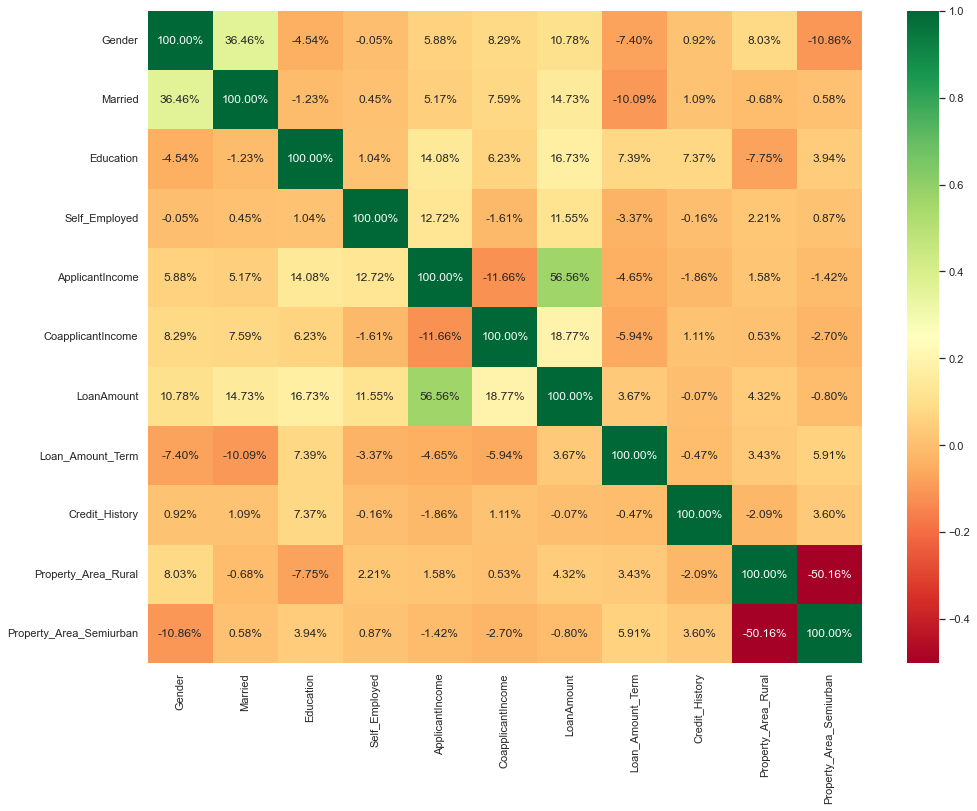

In [109]:
# TODO : Visualizing correlation of features
plt.figure(figsize = (16, 12))
sb.heatmap(loan_train_corr, cmap = 'RdYlGn', annot = True, fmt = '.2%')
plt.savefig('C:/Users/vinoth-pt5333/Project/correlation_of_features.png')

In [110]:
# TODO : To know whether the dataset is Balanced or Imbalanced
loan_train['Loan_Status'].value_counts()

Y    3376
N    1536
Name: Loan_Status, dtype: int64

We have to make the Training Data some more balanced

To make the data to be balanced, we are going to duplicate the samples having Loan_Status as NO

In [111]:
# TODO : Correlation of Features
corr_with_loan_status = loan_train.corrwith(loan_train['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x]))
corr_with_loan_status

Gender                     0.017987
Married                    0.091478
Education                  0.085884
Self_Employed             -0.003700
ApplicantIncome           -0.004710
CoapplicantIncome         -0.059187
LoanAmount                -0.035052
Loan_Amount_Term          -0.022549
Credit_History             0.540556
Property_Area_Rural       -0.100694
Property_Area_Semiurban    0.136540
dtype: float64

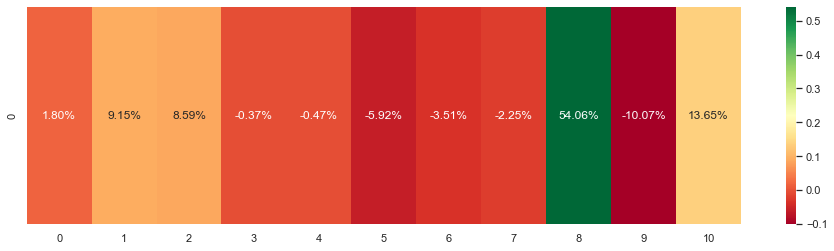

In [112]:
# Feature correlation with loan status
plt.figure(figsize = (16, 4))
sb.heatmap([corr_with_loan_status], cmap = 'RdYlGn', annot = True, fmt = '.2%')
plt.savefig('C:/Users/vinoth-pt5333/Project/correlation_of_features_with_loan_status.png')

Credit_History is having more correlation with Loan_Status

<Figure size 864x432 with 0 Axes>

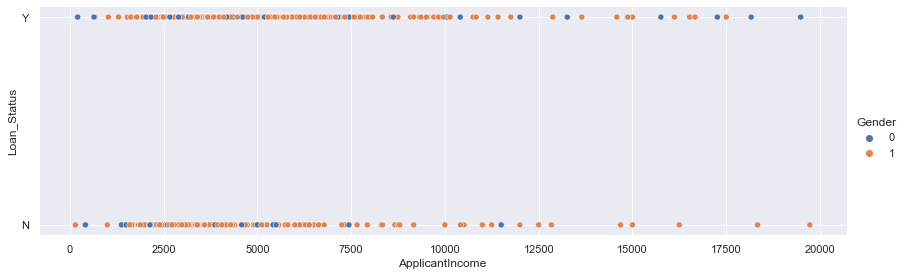

In [113]:
# TODO : Relation between Gender, Applicant Income and Loan Status
plt.figure(figsize = (12, 6))
sb.relplot(x = 'ApplicantIncome', y = 'Loan_Status', 
           data = loan_train[loan_train['ApplicantIncome'] <= 20000],
           hue = 'Gender', aspect = 3, height = 4)
plt.savefig("C:/Users/vinoth-pt5333/Project/ApplicantIncome.png")

Looks Same for both the cases

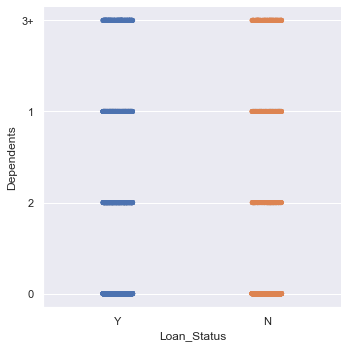

In [114]:
# Relation Between Dependents and Loan Status
sb.catplot(x = 'Loan_Status', y = 'Dependents', data = loan_train)
plt.savefig("C:/Users/vinoth-pt5333/Project/Dependents_On_Loan_status.png")

Looks same for both the cases

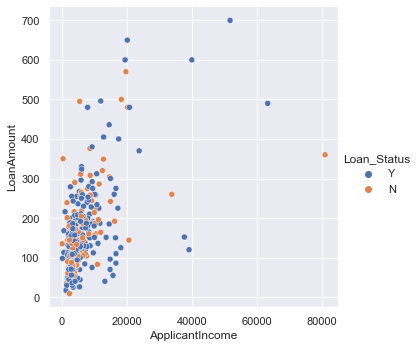

In [115]:
# Relation Between ApplicantIncome and LoanAmount with hue as Loan_Status
sb.relplot(x = 'ApplicantIncome', y = 'LoanAmount', data = loan_train, hue = 'Loan_Status')
plt.savefig("C:/Users/vinoth-pt5333/Project/Applicant_Income_LoanAmount.png")

There is a relation between LoanAmount and Applicant Income but not classifying Loan_Status

In [116]:
# # TODO : To know the feature Importances
y = loan_train['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x]).values
loan_train['Dependents'] = loan_train['Dependents'].replace(['3+'],'3')
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(loan_train.iloc[:, :-1].values, y)

print("Percentage Importance of each features with respect to Loan_Status : ")
pd.Series(etc.feature_importances_*100, index = loan_train.columns[:-1])


Percentage Importance of each features with respect to Loan_Status : 


Gender                      1.956229
Married                     2.490562
Dependents                  6.082608
Education                   2.252286
Self_Employed               2.449856
ApplicantIncome            18.488598
CoapplicantIncome          11.791142
LoanAmount                 18.491199
Loan_Amount_Term            4.581697
Credit_History             27.694754
Property_Area_Rural         1.742305
Property_Area_Semiurban     1.978763
dtype: float64

In [117]:
# from sklearn import linear_model
# model = linear_model.LinearRegression()
# model.fit(X_train, y_train)


# print("Training Accuracy : {}%".format(model.score(X_train, y_train) * 100))
# print("Testing Accuracy  : {}%".format(model.score(X_test, y_test) * 100))

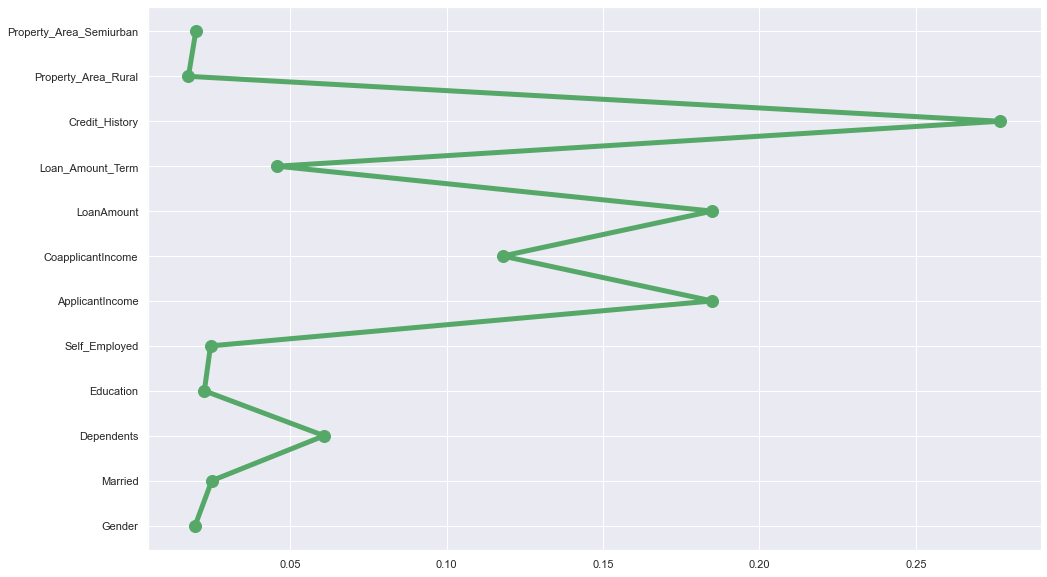

In [118]:
plt.figure(figsize=(16, 10))
plt.plot(etc.feature_importances_, loan_train.columns[:-1], 'g-o', linewidth=5, markersize=12)
plt.savefig("C:/Users/vinoth-pt5333/Project/feature_importances.png")

From the above plot, Credit_History (28 %) has the more importance, and then Loan Amount and Applicant Income and then Co-applicant Income

##### Relation Between Credit_History, Loan_Amount and Applicant_Income with Loan_Status

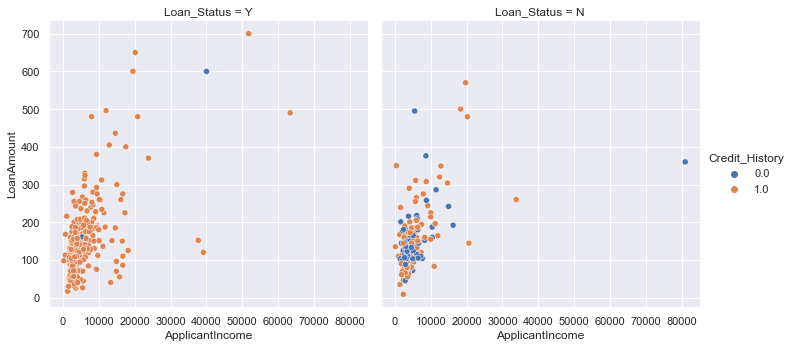

In [119]:
# TODO : Relation Between Credit_History, Loan_Amount and Applicant_Income with Loan_Status
sb.relplot(x = 'ApplicantIncome', y = 'LoanAmount', data = loan_train,
           hue = 'Credit_History', col = 'Loan_Status')
plt.savefig("C:/Users/vinoth-pt5333/Project/Relation_Between_CreditHistory,_LoanAmount_and_ApplicantIncome_with_LoanStatus.png")

From the above plot,

* The applicants those who are all having the credit history mostly getting te Loan Amount
* From this, Credit_History is the major feature.

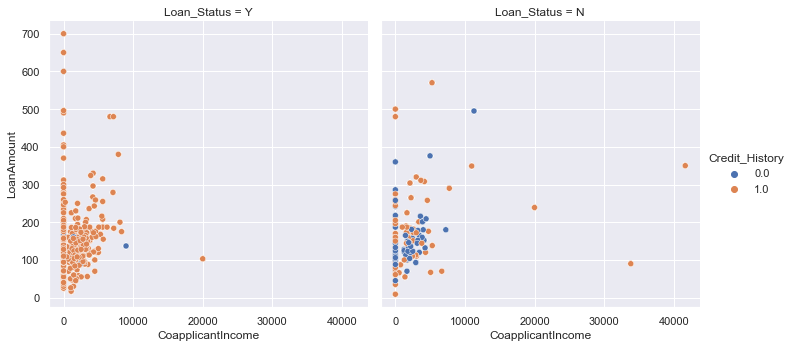

In [120]:
# TODO : Relation Between Credit_History, Loan_Amount and Coapplicant_Income with Loan_Status
sb.relplot(x = 'CoapplicantIncome', y = 'LoanAmount', data = loan_train,
           hue = 'Credit_History', col = 'Loan_Status')
plt.savefig("C:/Users/vinoth-pt5333/Project/Relation_Between_CreditHistory,_LoanAmount_and_CoapplicantIncome_with_LoanStatus.png")

##### Most of the Co-applicants are not having income

### Feature Selection

In [121]:
# TODO : Arranging features based on their importance to the Loan_Status
prediction_features = pd.Series(etc.feature_importances_*100, index = loan_train.columns[:-1]).sort_values(ascending = False)

In [122]:
# TODO : Extracting Features name
prediction_features = prediction_features.index

In [123]:
prediction_features = prediction_features[:5]
prediction_features

Index(['Credit_History', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome',
       'Dependents'],
      dtype='object')





### Model Building

In [124]:
feature_columns = loan_train[prediction_features]
prediction_column = loan_train['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x])

In [125]:
X = feature_columns.values
y = prediction_column.values

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [127]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3929, 5), (983, 5), (3929,), (983,))

## Linear Regresion with Model Performance

### Linear Regression

In [128]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

print("Training Accuracy : {}%".format(model.score(X_train, y_train) * 100))
print("Testing Accuracy  : {}%".format(model.score(X_test, y_test) * 100))

Training Accuracy : 29.810784793006107%
Testing Accuracy  : 30.046467824979807%


Thus our Linear Regression model is having 29.81% Training Accuracy and 30.04% Testing Accuracy

## Logistic Regresion with Model Performance


#### Simple Logistic Regression

In [129]:
logictic_model = LogisticRegression(max_iter = 200)
logictic_model.fit(X_train, y_train)

print("Training Accuracy : {}%".format(logictic_model.score(X_train, y_train) * 100))
print("Testing Accuracy  : {}%".format(logictic_model.score(X_test, y_test) * 100))

Training Accuracy : 74.54823110206159%
Testing Accuracy  : 74.77110885045778%


Thus our Logistic Regression model is having 74.54% Training Accuracy and 74.77% Testing Accuracy

In [130]:
train_scores = []
test_scores = []
logistic_model_dict = {}
random_states = list(range(50))
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)
    
    logictic_model = LogisticRegression(max_iter = 200)
    logictic_model.fit(X_train, y_train)
    
    train_score = logictic_model.score(X_train, y_train) * 100
    test_score = logictic_model.score(X_test, y_test) * 100
    
    logistic_model_dict[random_state] = {'Train Score' : train_score, 'Test Score' : test_score}
    train_scores.append(train_score)
    test_scores.append(test_score)

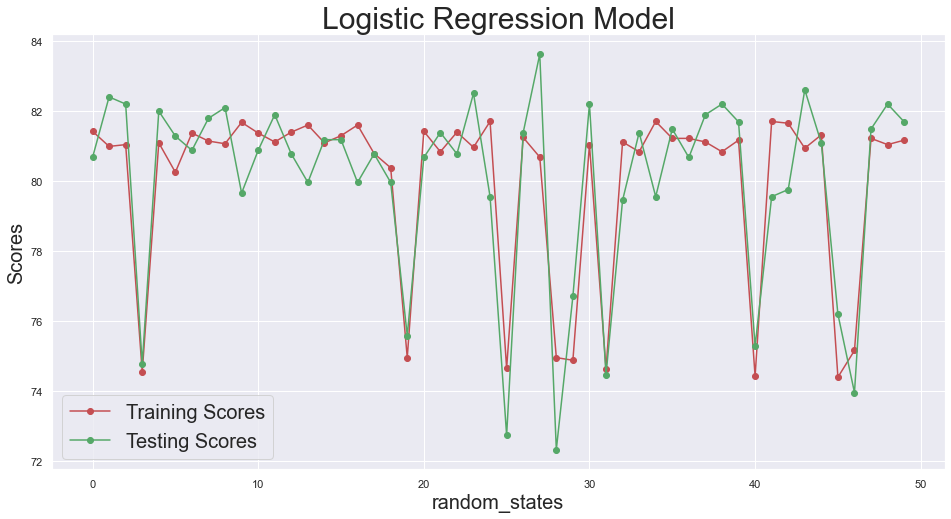

In [131]:
plt.figure(figsize = (16, 8))
plt.plot(random_states, train_scores, 'ro-')
plt.plot(random_states, test_scores, 'go-')
plt.xlabel('random_states', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Logistic Regression Model', fontsize = 30)
# plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'], fontsize = 20)
plt.savefig('C:/Users/vinoth-pt5333/Project/logistic_model_performance.png')
plt.show()

In [132]:
# Let's print the corresponding Training and Testing Scores
for scores in zip(train_scores, test_scores, abs(np.array(train_scores) - np.array(test_scores))):
    print(scores)

(81.42020870450496, 80.67141403865718, 0.7487946658477824)
(80.98752863324002, 82.40081383519838, 1.4132852019583595)
(81.0384321710359, 82.19735503560528, 1.1589228645693908)
(74.54823110206159, 74.77110885045778, 0.22287774839618635)
(81.08933570883177, 81.9938962360122, 0.9045605271804362)
(80.2494273351998, 81.28179043743641, 1.0323631022366158)
(81.36930516670908, 80.87487283825025, 0.4944323284588279)
(81.14023924662764, 81.79043743641913, 0.6501981897914817)
(81.06388393993382, 82.09562563580874, 1.0317416958749277)
(81.67472639348435, 79.65412004069175, 2.0206063527925977)
(81.36930516670908, 80.87487283825025, 0.4944323284588279)
(81.1147874777297, 81.89216683621567, 0.777379358485959)
(81.39475693560702, 80.77314343845372, 0.6216134971533052)
(81.59837108679054, 79.95930824008138, 1.6390628467091517)
(81.08933570883177, 81.18006103763989, 0.09072532880811934)
(81.29294986001527, 81.18006103763989, 0.11288882237538189)
(81.59837108679054, 79.95930824008138, 1.6390628467091517)

See how training accuracy and testing accuracy changing for different training Samples

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)





## Logistic Regression with Standard Scaling and PCA

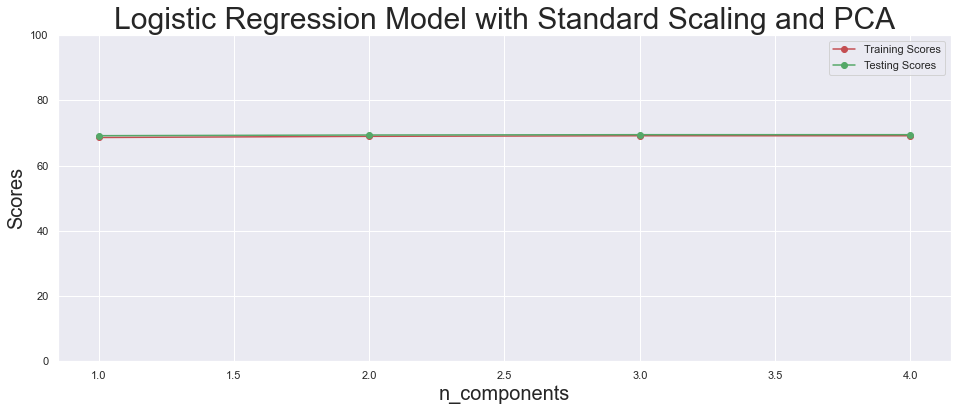

In [134]:
training_scores = []
testing_scores = []
n_components = list(range(1, 5))
for n_component in n_components:
#     # Converting Train Data to Same Scale
#     standard_scaler = StandardScaler()
#     # Scaling training samples
#     scaled_X_train = standard_scaler.fit_transform(X_train)
#     # Scaling testing samples
#     scaled_X_test = standard_scaler.transform(X_test)
    
    # PCA Implementation
    pca = PCA(n_components = n_component)
    pca_X_train = pca.fit_transform(X_train)
    pca_X_test = pca.transform(X_test)
    
    logictic_model = LogisticRegression(max_iter = 200)
    logictic_model.fit(pca_X_train, y_train)
    training_scores.append(logictic_model.score(pca_X_train, y_train) * 100)
    testing_scores.append(logictic_model.score(pca_X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(n_components, training_scores, 'ro-')
plt.plot(n_components, testing_scores, 'go-')
plt.xlabel('n_components', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Logistic Regression Model with Standard Scaling and PCA', fontsize = 30)
plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'])
plt.savefig("C:/Users/vinoth-pt5333/Project/Logistic_Regression_Model_with_Standard_Scaling_and_PCA.png")
plt.show()

## Decision Tree Classifier with Model Performance

### Simple Decision Tree Classifier

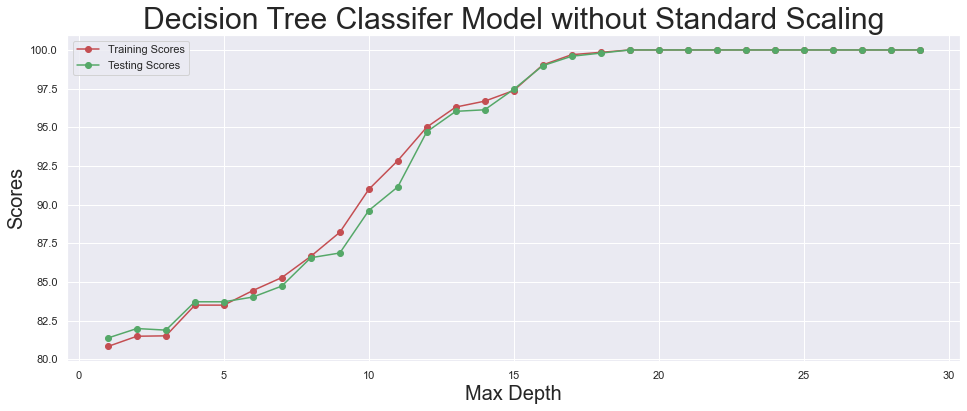

In [135]:
training_scores = []
testing_scores = []
max_depths = list(range(1, 30))
for max_depth in max_depths:
    decision_tree_classifier = DecisionTreeClassifier(max_depth = max_depth)
    decision_tree_classifier.fit(X_train, y_train)
    training_scores.append(decision_tree_classifier.score(X_train, y_train) * 100)
    testing_scores.append(decision_tree_classifier.score(X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(max_depths, training_scores, 'ro-')
plt.plot(max_depths, testing_scores, 'go-')
plt.xlabel('Max Depth', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Decision Tree Classifer Model without Standard Scaling', fontsize = 30)
# plt.ylim(50, 105)
plt.legend(labels = ['Training Scores', 'Testing Scores'])
plt.savefig('C:/Users/vinoth-pt5333/Project/decision_tree_classifier_model_performance.png')
plt.show()

In [136]:
# Let's print the corresponding Training and Testing Scores
for scores in zip(training_scores, testing_scores, abs(np.array(training_scores) - np.array(testing_scores))):
    print(scores)

(80.83481801985238, 81.38351983723297, 0.5487018173805893)
(81.49656401119879, 81.9938962360122, 0.49733222481341954)
(81.52201578009671, 81.89216683621567, 0.3701510561189565)
(83.50725375413592, 83.7232960325534, 0.2160422784174898)
(83.50725375413592, 83.7232960325534, 0.2160422784174898)
(84.44896920335964, 84.02848423194304, 0.4204849714165988)
(85.28887757699161, 84.74059003051883, 0.5482875464727783)
(86.66327309748027, 86.57171922685656, 0.0915538706237129)
(88.21583100025452, 86.87690742624619, 1.3389235740083336)
(90.9900738101298, 89.6236012207528, 1.366472589376997)
(92.8480529396793, 91.14954221770091, 1.6985107219783941)
(95.01145329600406, 94.71007121057986, 0.3013820854242084)
(96.30949350979893, 96.0325534079349, 0.27694010186402807)
(96.691270043268, 96.13428280773142, 0.5569872355365817)
(97.37846780351235, 97.45676500508647, 0.07829720157411657)
(99.03283278187834, 98.98270600203459, 0.050126779843751024)
(99.69457877322473, 99.59308240081384, 0.10149637241089238)
(

For Decision Tree Classifier model, we are going to choose max_depth as 8 from the above plot.

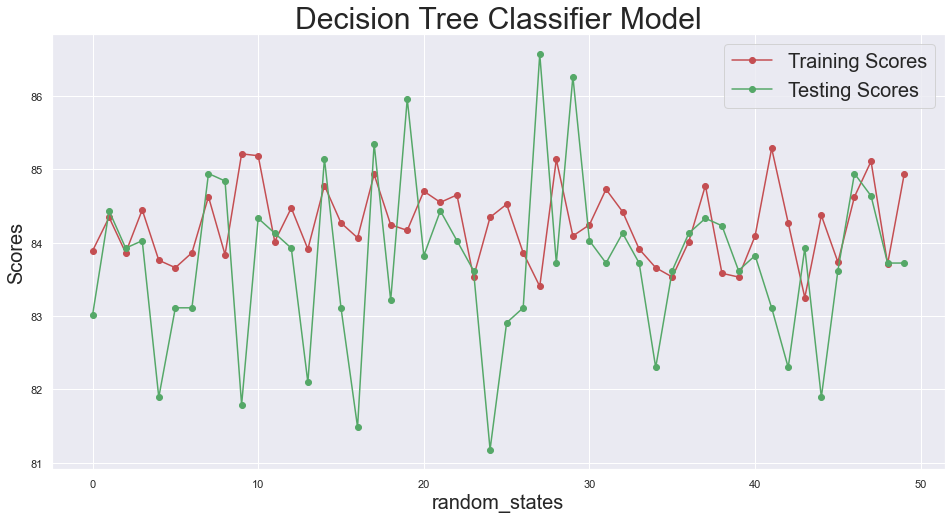

In [137]:
train_scores = []
test_scores = []
decision_tree_model_dict = {}
random_states = list(range(50))
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)
    
    decision_tree_model = DecisionTreeClassifier(max_depth = 6)
    decision_tree_model.fit(X_train, y_train)
    
    train_score = decision_tree_model.score(X_train, y_train) * 100
    test_score = decision_tree_model.score(X_test, y_test) * 100
    
    decision_tree_model_dict[random_state] = {'Train Score' : train_score, 'Test Score' : test_score}
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize = (16, 8))
plt.plot(random_states, train_scores, 'ro-')
plt.plot(random_states, test_scores, 'go-')
plt.xlabel('random_states', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Decision Tree Classifier Model', fontsize = 30)
# plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'], fontsize = 20)
plt.savefig('C:/Users/vinoth-pt5333/Project/decision_tree_model_performance.png')
plt.show()

#### Decision Tree Classifier with Standard Scaling

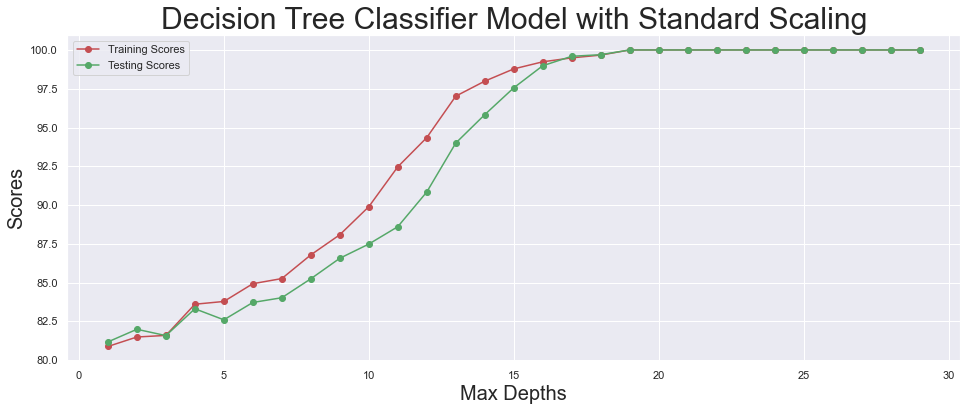

In [138]:
training_scores = []
testing_scores = []
max_depths = list(range(1, 30))
for max_depth in max_depths:
    # Converting Train Data to Same Scale
    standard_scaler = StandardScaler()
    
    scaled_X_train = standard_scaler.fit_transform(X_train)
    scaled_X_test = standard_scaler.transform(X_test)
    
    decision_tree_model = DecisionTreeClassifier(max_depth = max_depth)
    decision_tree_model.fit(scaled_X_train, y_train)
    training_scores.append(decision_tree_model.score(scaled_X_train, y_train) * 100)
    testing_scores.append(decision_tree_model.score(scaled_X_test, y_test) * 100)

plt.figure(figsize = (16, 6))
plt.plot(max_depths, training_scores, 'ro-')
plt.plot(max_depths, testing_scores, 'go-')
plt.xlabel('Max Depths', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Decision Tree Classifier Model with Standard Scaling', fontsize = 30)
# plt.ylim(50, 105)
plt.savefig("C:/Users/vinoth-pt5333/Project/Decision-Tree-Classifier-Model-with-Standard-Scaling.png")
plt.legend(labels = ['Training Scores', 'Testing Scores'])
plt.show()

For Decision Tree Classifier model, we are going to choose max_depth as 8 from the above plot.

In [139]:
# Let's print the corresponding Training and Testing Scores
for scores in zip(training_scores, testing_scores):
    print(scores)

(80.88572155764825, 81.18006103763989)
(81.49656401119879, 81.9938962360122)
(81.59837108679054, 81.58697863682605)
(83.60906082972767, 83.31637843336725)
(83.78722321201325, 82.60427263479146)
(84.93255281242045, 83.7232960325534)
(85.26342580809366, 84.02848423194304)
(86.79053194196996, 85.24923702950153)
(88.08857215576482, 86.57171922685656)
(89.89564774751845, 87.48728382502543)
(92.46627640621024, 88.60630722278738)
(94.34970730465767, 90.8443540183113)
(97.02214303894121, 93.99796541200406)
(97.98931025706287, 95.82909460834182)
(98.77831509289896, 97.558494404883)
(99.23644693306186, 98.98270600203459)
(99.49096462204123, 99.59308240081384)
(99.6691270043268, 99.69481180061037)
(100.0, 100.0)
(100.0, 100.0)
(100.0, 100.0)
(100.0, 100.0)
(100.0, 100.0)
(100.0, 100.0)
(100.0, 100.0)
(100.0, 100.0)
(100.0, 100.0)
(100.0, 100.0)
(100.0, 100.0)


For max_depth = 8, we get a Training Accuracy of 85.26% and a Testing Accuracy of 84.02%

### Decision Tree Classifier with Standard Scaling and PCA

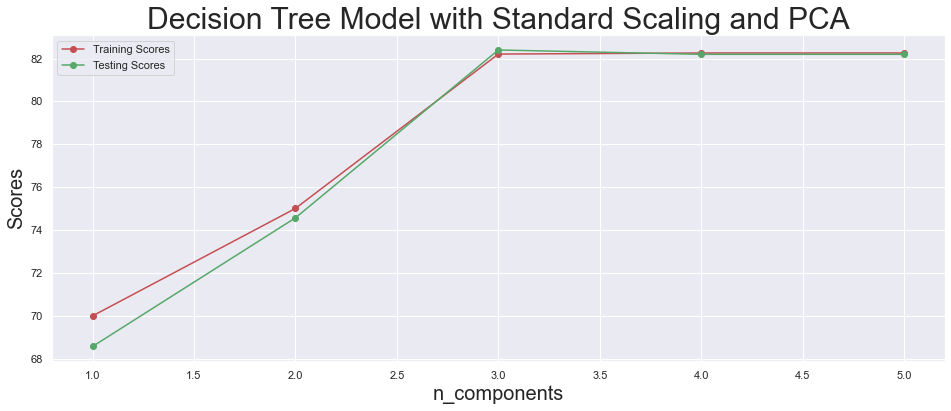

Max_Depth :  3
(69.99236446933061, 68.56561546286876)
(75.00636294222448, 74.5676500508647)
(82.20921354034105, 82.40081383519838)
(82.26011707813693, 82.19735503560528)
(82.26011707813693, 82.19735503560528)


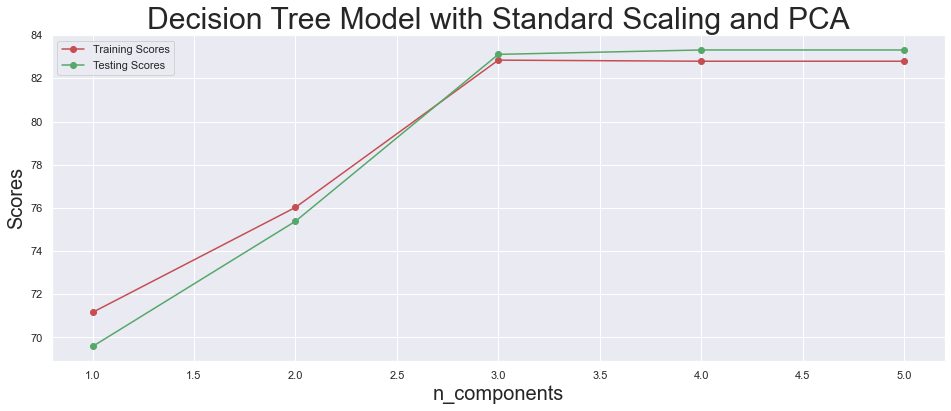

Max_Depth :  4
(71.16314583863578, 69.58290946083419)
(76.02443369814202, 75.38148524923703)
(82.84550776278951, 83.11291963377417)
(82.79460422499363, 83.31637843336725)
(82.79460422499363, 83.31637843336725)


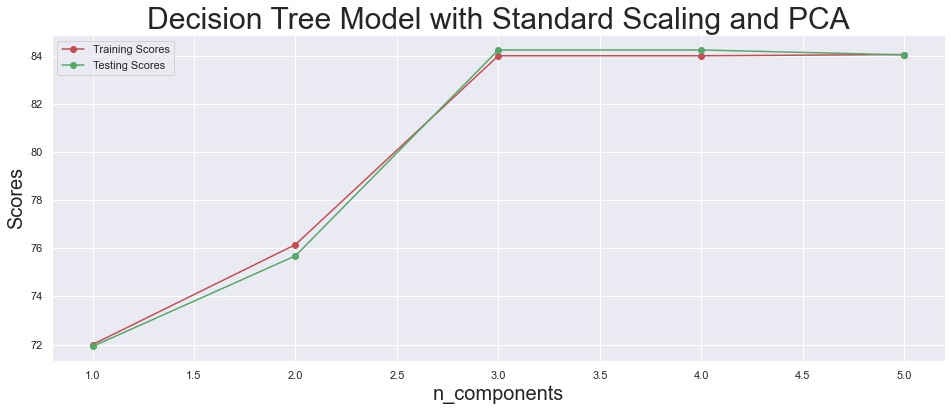

Max_Depth :  5
(72.00305421226774, 71.92268565615463)
(76.15169254263171, 75.68667344862665)
(83.99083736319675, 84.23194303153612)
(83.99083736319675, 84.23194303153612)
(84.04174090099262, 84.02848423194304)


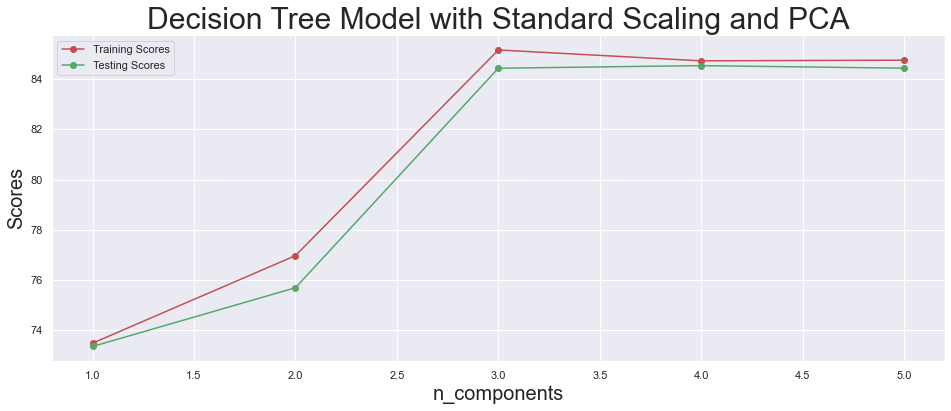

Max_Depth :  6
(73.47925680834818, 73.34689725330621)
(76.96614914736574, 75.68667344862665)
(85.1616187325019, 84.4354018311292)
(84.72893866123695, 84.53713123092574)
(84.75439043013489, 84.4354018311292)


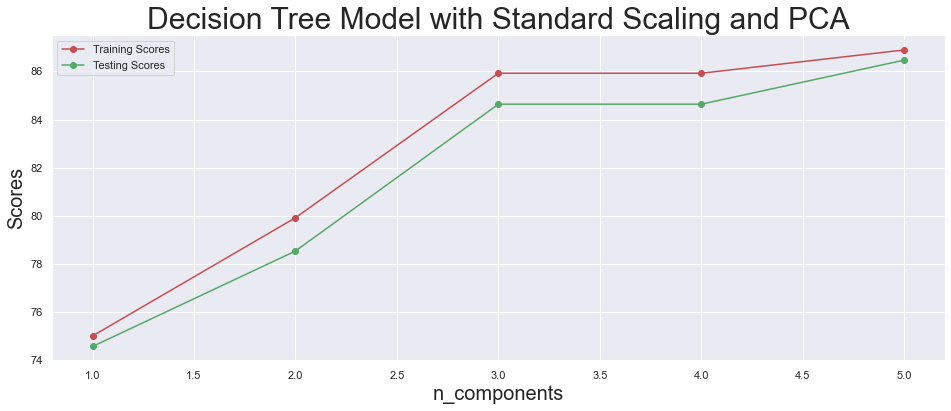

Max_Depth :  7
(75.00636294222448, 74.5676500508647)
(79.9185543395266, 78.5350966429298)
(85.92517179944007, 84.63886063072228)
(85.92517179944007, 84.63886063072228)
(86.89233901756172, 86.46998982706002)


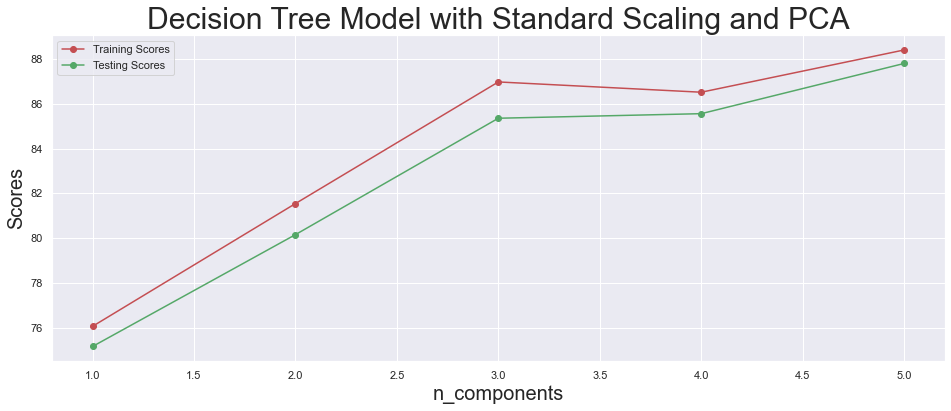

Max_Depth :  8
(76.0753372359379, 75.17802644964394)
(81.54746754899466, 80.16276703967446)
(86.96869432425554, 85.35096642929807)
(86.51056248409265, 85.55442522889115)
(88.39399338254009, 87.79247202441506)


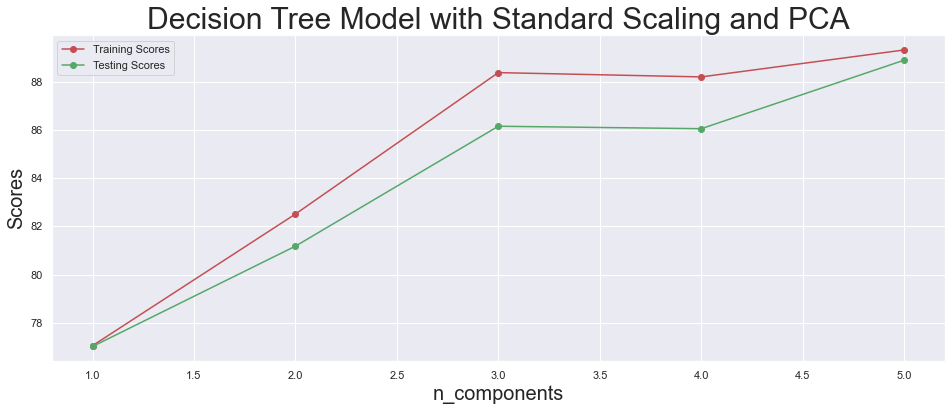

Max_Depth :  9
(77.04250445405955, 77.00915564598169)
(82.51463476711632, 81.18006103763989)
(88.39399338254009, 86.1648016276704)
(88.21583100025452, 86.06307222787386)
(89.33570883176381, 88.91149542217701)


In [140]:
for max_depth in range(3, 10):
    training_scores = []
    testing_scores = []
    n_components = list(range(1, 6))
    for n_component in n_components:
        # Converting Train Data to Same Scale
        standard_scaler = StandardScaler()
        # Scaling training samples
        scaled_X_train = standard_scaler.fit_transform(X_train)
        # Scaling testing samples
        scaled_X_test = standard_scaler.transform(X_test)

        # PCA Implementation
        pca = PCA(n_components = n_component)
        pca_X_train = pca.fit_transform(scaled_X_train)
        pca_X_test = pca.transform(scaled_X_test)

        decision_tree_model = DecisionTreeClassifier(max_depth = max_depth)
        decision_tree_model.fit(pca_X_train, y_train)
        training_scores.append(decision_tree_model.score(pca_X_train, y_train) * 100)
        testing_scores.append(decision_tree_model.score(pca_X_test, y_test) * 100)

    plt.figure(figsize = (16, 6))
    plt.plot(n_components, training_scores, 'ro-')
    plt.plot(n_components, testing_scores, 'go-')
    plt.xlabel('n_components', fontsize = 20)
    plt.ylabel('Scores', fontsize = 20)
    plt.title('Decision Tree Model with Standard Scaling and PCA', fontsize = 30)
    # plt.ylim(60, 90)
    plt.savefig("C:/Users/vinoth-pt5333/Project/Decision-Tree Model-with-Standard-Scaling-and-PCA.png")
    plt.legend(labels = ['Training Scores', 'Testing Scores'])
    plt.show()
    
    # Let's print the corresponding Training and Testing Scores
    print("Max_Depth : ", max_depth)
    for scores in zip(training_scores, testing_scores):
        print(scores)

With PCA, Statndard Scaling and Decision Tree Classifier, we can get a Training accuracy of 85% and a Testing accuracy of 83%

## A Final overview of different kind of Model Based on their performance

#### Simple Linear Regression Model :


* Training Accuracy : 29.810784793006107%
* Testing Accuracy  : 30.046467824979807%

can't get a good model


#### Simple Logistic Regression Model without Standard Scaling and without PCA :

* Training Samples with random_state = 3
* Training Accuracy : 74.54823110206159%
* Testing Accuracy  : 74.77110885045778%

#### Logistic Model with Standard Scaling and PCA :

* Can't get a good model

#### Decision Tree Classifier Model without Standard Scaling and without PCA :

* random_state = 3
* Max-Depth = 8
* Training Accuracy : 85.26 %
* Testing Accuracy : 84.02 %

#### Decision Tree Classifier Model with Standard Scaling and without PCA :

* random_state = 3
* Max-Depth = 8
* Training Accuracy : 85.74 %
* Testing Accuracy : 85.36 %

#### Decision Tree Classifier Model with Standard Scaling and with PCA :

* random_state = 3
* Max-Depth = 6
* n_components (PCA) = 5
* Training Accuracy : 84.92 %
* Testing Accuracy : 83.73 %

# --------------------------------------------------------------------------------------------

#### Building Optimal Model with Decision Tree without Standard Scaling and without PCA

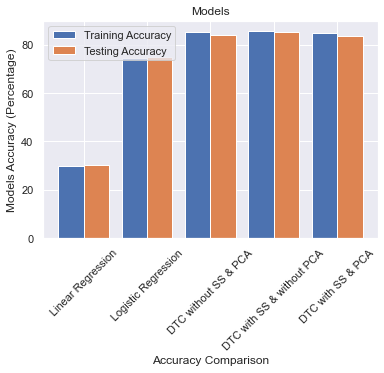

In [141]:
X = ['Linear Regression','Logistic Regression','DTC without SS & PCA','DTC with SS & without PCA', 'DTC with SS & PCA']
trainingAccuracy = [29.81, 74.54, 85.26, 85.74, 84.92]
testingAccuracy = [30.04, 74.77, 84.02, 85.36, 83.73]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, trainingAccuracy, 0.4, label = 'Training Accuracy')
plt.bar(X_axis + 0.2, testingAccuracy, 0.4, label = 'Testing Accuracy')
  
plt.xticks(X_axis, X)
plt.xlabel("Accuracy Comparison")
plt.ylabel("Models Accuracy (Percentage)")
plt.title("Models")
plt.xticks(rotation = 45)
plt.legend()
plt.savefig('C:/Users/vinoth-pt5333/Project/OverAll_model_performance.png')
plt.show()


* DTC - Decision tree classifier
* SS - standard scaling
* PCA - Principal component Analysis Python

In [142]:
feature_values = feature_columns.values
prediction_values = loan_train['Loan_Status'].values

In [143]:
decision_tree_model = DecisionTreeClassifier(max_depth = 8)
decision_tree_model.fit(feature_values, prediction_values)

print("Score : ", decision_tree_model.score(feature_values, prediction_values))

Score :  0.8534201954397395


## Test Data Predictions

In [144]:
loan_test = pd.read_csv('C:/Users/vinoth-pt5333/Project/test.csv')
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP005915,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP005916,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP005917,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP005918,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP005919,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [145]:
loan_test = loan_test.loc[:, prediction_features]
loan_test.head()

,Credit_History,LoanAmount,ApplicantIncome,CoapplicantIncome,Dependents
0,1.0,110.0,5720,0,0
1,1.0,126.0,3076,1500,1
2,1.0,208.0,5000,1800,2
3,NaN,100.0,2340,2546,2
4,1.0,78.0,3276,0,0


In [146]:
# Preprocessing Test Data

# TODO : Check for null values
loan_test.isnull().sum()

Credit_History       87
LoanAmount           15
ApplicantIncome       0
CoapplicantIncome     0
Dependents           30
dtype: int64

The major feature for our model prediction is credit_history

so we are going to remove the samples having null values on Credit_History

In [147]:
loan_test = loan_test.dropna(how = 'any')

In [148]:
loan_test.isnull().sum()

Credit_History       0
LoanAmount           0
ApplicantIncome      0
CoapplicantIncome    0
Dependents           0
dtype: int64

In [149]:
# TODO : Encoding Categorical data into NUmerical Data
loan_test['Dependents'] = loan_test['Dependents'].apply(lambda x : {'0' : 0, '1' : 1, '2' : 2, '3+' : 3}[x])

In [150]:
loan_test['Loan_Status_Predicted'] = decision_tree_model.predict(loan_test.values)

In [151]:
loan_test.head(25)

,Credit_History,LoanAmount,ApplicantIncome,CoapplicantIncome,Dependents,Loan_Status_Predicted
0,1.0,110.0,5720,0,0,Y
1,1.0,126.0,3076,1500,1,Y
2,1.0,208.0,5000,1800,2,Y
4,1.0,78.0,3276,0,0,Y
5,1.0,152.0,2165,3422,0,Y
6,1.0,59.0,2226,0,1,N
7,0.0,147.0,3881,0,2,N
8,1.0,280.0,13633,0,2,Y
9,1.0,123.0,2400,2400,0,Y
10,1.0,90.0,3091,0,0,Y


In [152]:
loan_test.Loan_Status_Predicted.value_counts()

Y    792
N    186
Name: Loan_Status_Predicted, dtype: int64

We have built a Decision Tree Classifier which performs well with selected features such as Credit_History, LoanAmount, ApplicantIncome, CoapplicantIncome and Dependents having the Training accuracy of 85.53% and Testing accuracy of 85.36%.